In [24]:
from utils.dataDownloader import StationData
from utils.osmGraph import GraphFromHmlFile
import os
import pandas as pd
import io
import geopandas as gpd
from utils.apiKeys import Censusapi
import requests


In [2]:
dataFolder = "./data"
graphFileName = "hennepinCounty.graphml"
graph = GraphFromHmlFile(os.path.join(dataFolder, graphFileName))
print(len(graph.edgesGdf))

109283


In [ ]:
stationFileName = "stationData_MN.csv"
stationData = StationData(os.path.join(dataFolder, stationFileName), download = False)

In [5]:
stationData.data.describe()

,ZIP,Latitude,Longitude,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,55482.341682,45.113029,-93.351857,0.039356,1.930233,0.431127
std,405.437592,0.795041,0.799114,0.547287,1.322726,1.535190
min,53662.000000,43.633850,-96.767240,0.000000,0.000000,0.000000
25%,55124.500000,44.858374,-93.446979,0.000000,1.000000,0.000000
50%,55405.000000,44.969550,-93.275995,0.000000,2.000000,0.000000
75%,55606.000000,45.078028,-93.088530,0.000000,2.000000,0.000000
max,56636.000000,48.054129,-89.692650,12.000000,16.000000,12.000000


In [15]:
stationDataSelected = stationData.data[stationData.data['ZIP'] == 55455]

In [16]:
stationDataSelected.index

Int64Index([36, 52, 76, 77, 80, 81, 105, 188], dtype='int64')

In [17]:
stationPositionList = []
for i in stationDataSelected.index:
    stationPositionList.append((stationDataSelected.loc[i, 'Latitude'], stationDataSelected.loc[i, 'Longitude']))

In [18]:
stationPositionList

[(44.974036, -93.230989),
 (44.969677, -93.243328),
 (44.97145, -93.236027),
 (44.976321, -93.23395),
 (44.978214, -93.224562),
 (44.976277, -93.228946),
 (44.973875, -93.230153),
 (44.979167, -93.228946)]

In [51]:
# B01001_001E: population
getAttributes = "NAME,B01001_001E"
censusData = requests.get("https://api.census.gov/data/2020/acs/acs5?get="+ getAttributes +"&for=block%20group:*&in=state:27&in=county:*&in=tract:*&key="+Censusapi.getKey())

In [53]:
censusDataJson = censusData.json()

In [54]:
censusDF=pd.DataFrame(censusDataJson[1:], columns=censusDataJson[0])

In [69]:
censusDF['GEOID'] = censusDF['state'] + censusDF['county'] + censusDF['tract'] + censusDF['block group']
censusDF = censusDF.drop(columns = ["state", "county", "tract", 'block group'])

In [70]:
censusDF.head()

,NAME,B01001_001E,state,county,tract,block group,geoid,GEOID
0,"Block Group 1, Census Tract 9511, Crow Wing Co...",1466,27,035,951100,1,270359511001,270359511001
1,"Block Group 3, Census Tract 9511, Crow Wing Co...",935,27,035,951100,3,270359511003,270359511003
2,"Block Group 2, Census Tract 9512, Crow Wing Co...",982,27,035,951200,2,270359512002,270359512002
3,"Block Group 2, Census Tract 9513.01, Crow Wing...",1033,27,035,951301,2,270359513012,270359513012
4,"Block Group 2, Census Tract 9513.03, Crow Wing...",503,27,035,951303,2,270359513032,270359513032


In [59]:
mnBlockGroup = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2020/BG/tl_2020_27_bg.zip")

<AxesSubplot:>

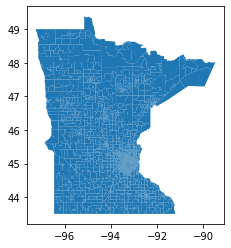

In [60]:
mnBlockGroup.plot()

In [61]:
mnBlockGroup.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,27,051,070100,1,270510701001,Block Group 1,G5030,S,17698490,1460274,+45.9945919,-095.9708961,"POLYGON ((-96.00778 45.97887, -96.00778 45.979..."
1,27,051,070200,3,270510702003,Block Group 3,G5030,S,27137279,586847,+45.8345936,-095.7965525,"POLYGON ((-95.84144 45.81994, -95.84144 45.820..."
2,27,051,070200,1,270510702001,Block Group 1,G5030,S,359261041,16334586,+45.8378837,-095.9108467,"POLYGON ((-96.13048 45.86130, -96.12940 45.861..."
3,27,051,070100,2,270510701002,Block Group 2,G5030,S,498024195,43000411,+46.0472279,-095.9664894,"POLYGON ((-96.26618 46.02237, -96.26614 46.024..."
4,27,053,026508,2,270530265082,Block Group 2,G5030,S,1788814,819265,+45.0508328,-093.4363308,"POLYGON ((-93.44624 45.05509, -93.44624 45.055..."


In [71]:
censusDF = mnBlockGroup.merge(censusDF, on = "GEOID")

In [74]:
censusDF.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME,B01001_001E,state,county,tract,block group,geoid
0,27,051,070100,1,270510701001,Block Group 1,G5030,S,17698490,1460274,+45.9945919,-095.9708961,"POLYGON ((-96.00778 45.97887, -96.00778 45.979...","Block Group 1, Census Tract 701, Grant County,...",1166,27,051,070100,1,270510701001
1,27,051,070200,3,270510702003,Block Group 3,G5030,S,27137279,586847,+45.8345936,-095.7965525,"POLYGON ((-95.84144 45.81994, -95.84144 45.820...","Block Group 3, Census Tract 702, Grant County,...",713,27,051,070200,3,270510702003
2,27,051,070200,1,270510702001,Block Group 1,G5030,S,359261041,16334586,+45.8378837,-095.9108467,"POLYGON ((-96.13048 45.86130, -96.12940 45.861...","Block Group 1, Census Tract 702, Grant County,...",1019,27,051,070200,1,270510702001
3,27,051,070100,2,270510701002,Block Group 2,G5030,S,498024195,43000411,+46.0472279,-095.9664894,"POLYGON ((-96.26618 46.02237, -96.26614 46.024...","Block Group 2, Census Tract 701, Grant County,...",1997,27,051,070100,2,270510701002
4,27,053,026508,2,270530265082,Block Group 2,G5030,S,1788814,819265,+45.0508328,-093.4363308,"POLYGON ((-93.44624 45.05509, -93.44624 45.055...","Block Group 2, Census Tract 265.08, Hennepin C...",1390,27,053,026508,2,270530265082


In [75]:
censusDF = df_merge

In [76]:
censusDF.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME,B01001_001E,state,county,tract,block group,geoid
0,27,051,070100,1,270510701001,Block Group 1,G5030,S,17698490,1460274,+45.9945919,-095.9708961,"POLYGON ((-96.00778 45.97887, -96.00778 45.979...","Block Group 1, Census Tract 701, Grant County,...",1166,27,051,070100,1,270510701001
1,27,051,070200,3,270510702003,Block Group 3,G5030,S,27137279,586847,+45.8345936,-095.7965525,"POLYGON ((-95.84144 45.81994, -95.84144 45.820...","Block Group 3, Census Tract 702, Grant County,...",713,27,051,070200,3,270510702003
2,27,051,070200,1,270510702001,Block Group 1,G5030,S,359261041,16334586,+45.8378837,-095.9108467,"POLYGON ((-96.13048 45.86130, -96.12940 45.861...","Block Group 1, Census Tract 702, Grant County,...",1019,27,051,070200,1,270510702001
3,27,051,070100,2,270510701002,Block Group 2,G5030,S,498024195,43000411,+46.0472279,-095.9664894,"POLYGON ((-96.26618 46.02237, -96.26614 46.024...","Block Group 2, Census Tract 701, Grant County,...",1997,27,051,070100,2,270510701002
4,27,053,026508,2,270530265082,Block Group 2,G5030,S,1788814,819265,+45.0508328,-093.4363308,"POLYGON ((-93.44624 45.05509, -93.44624 45.055...","Block Group 2, Census Tract 265.08, Hennepin C...",1390,27,053,026508,2,270530265082


In [77]:
censusDF['INTPTLAT'] = pd.to_numeric(censusDF['INTPTLAT'],errors='coerce')

In [80]:
censusDF['INTPTLON'] = pd.to_numeric(censusDF['INTPTLON'],errors='coerce')

In [82]:
censusDF['INTPTLON']

0      -95.970896
1      -95.796553
2      -95.910847
3      -95.966489
4      -93.436331
          ...    
4701   -93.205055
4702   -93.084316
4703   -93.110475
4704   -96.527317
4705   -96.977461
Name: INTPTLON, Length: 4706, dtype: float64

In [84]:
censusBlockList = []
for i in range(5):
    censusBlockList.append((censusDF.loc[i, 'INTPTLAT'], censusDF.loc[i, 'INTPTLON']))

In [85]:
censusBlockList

[(45.9945919, -95.9708961),
 (45.8345936, -95.7965525),
 (45.8378837, -95.9108467),
 (46.0472279, -95.9664894),
 (45.0508328, -93.4363308)]

In [94]:
positionDict = {"station": stationPositionList, "census block group": censusBlockList}

In [87]:
import plotly.graph_objects as go
import numpy as np
import plotly

In [91]:
censusDFUMN = censusDF[censusDF['TRACTCE']=='104901']

In [98]:
censusDFUMN

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME,B01001_001E,state,county,tract,block group,geoid
559,27,053,104901,1,270531049011,Block Group 1,G5030,S,421213,112735,44.971982,-93.233441,"POLYGON ((-93.23927 44.97326, -93.23880 44.973...","Block Group 1, Census Tract 1049.01, Hennepin ...",4484,27,053,104901,1,270531049011
763,27,053,104901,2,270531049012,Block Group 2,G5030,S,908632,54854,44.977829,-93.234230,"POLYGON ((-93.24385 44.97931, -93.24376 44.979...","Block Group 2, Census Tract 1049.01, Hennepin ...",1998,27,053,104901,2,270531049012


In [92]:
censusBlockList = []
for i in censusDFUMN.index:
    censusBlockList.append((censusDFUMN.loc[i, 'INTPTLAT'], censusDFUMN.loc[i, 'INTPTLON']))

In [93]:
censusBlockList

[(44.9719823, -93.2334415), (44.9778291, -93.2342296)]

In [95]:
figureFolder = "./results"
figureName = "test.html"
plotData(positionDict, ['red', 'green'] ,os.path.join(figureFolder,figureName ))

In [107]:
censusDF.to_csv("./data/censusData_MN_Population.csv")

<AxesSubplot:>

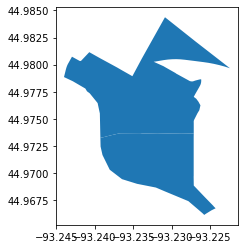

In [96]:
censusDFUMN.plot()

In [99]:
import networkx as nx

In [100]:
from utils.spatialShapes import Point

In [101]:
import osmnx as ox

In [103]:
latlist, lonlist = zip(*censusBlockList)
ox.distance.nearest_nodes(graph.graph, lonlist, latlist, return_dist=True)

([246710361, 34177358], [62.441805227521264, 73.49242906040053])

In [104]:
ox.distance.shortest_path(graph.graph, 246710361, 34177358, weight='length')

[246710361,
 246710356,
 1821777933,
 246710346,
 34198362,
 34656986,
 1813420189,
 33632334,
 3611069368,
 33632452,
 240886357,
 240886375,
 34177358]

In [106]:
for o in positionDict['census block group']:
    for d in positionDict['station']:
        origin, dist1 = ox.distance.nearest_nodes(graph.graph, o[1], o[0], return_dist=True)
        destination, dist2 = ox.distance.nearest_nodes(graph.graph, d[1], d[0], return_dist=True)
        path = ox.distance.shortest_path(graph.graph, origin, destination, weight='length')
        print(dist1,dist2,path)

62.441805227521264 70.46782681917685 [246710361, 246710356, 1821777933, 246710346, 34198362, 34665658, 34646309, 244113404, 33359705, 261298089, 244111945, 320363001]
62.441805227521264 66.12555583876915 [246710361, 246710356, 1821777933, 246710346, 34198362, 34656986, 1813420189, 33632334, 1449264315, 33304001, 1449264307, 244113498, 34667306, 34645936, 34655777, 33822058]
62.441805227521264 98.20830048064921 [246710361, 246710356, 9421986672]
62.441805227521264 73.64302031497375 [246710361, 246710356, 1821777933, 246710346, 34198362, 34656986, 1813420189, 33632334, 3611069368, 33842546]
62.441805227521264 130.50664577950886 [246710361, 246710356, 1821777933, 246710346, 34198362, 34656986, 1813420189, 33632334, 3611069368, 33842546, 244112865, 34174403, 34178512, 34504631, 34566808]
62.441805227521264 91.46854165968767 [246710361, 246710356, 1821777933, 246710346, 34198362, 34656986, 1813420189, 33632334, 3611069368, 33842546, 244112865, 34174403, 34177210, 261319041]
62.4418052275212